In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
X = df[["Weight"]]
Y = df[["Height"]]
X.head(2)

,Weight
0,241.893563
1,162.310473


Text(0.5, 0, 'B')

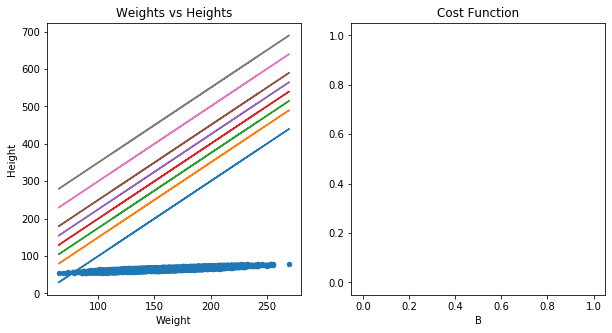

In [5]:
def line(x,w=0,b=0):
    return w * x + b #Like a line

def mean_squared_error(y_true,y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

y_true = Y

plt.figure(figsize=(10,5))
ax1  = plt.subplot(121)
df.plot(kind='scatter',x='Weight',y='Height',title="Weights vs Heights",ax=ax1)

bs = np.array([-100,-50,-25,0,25,50,100,150])

mses =[]#Mean Square Error
for b in bs:
    y_pred = line(X,w=2,b=b)
    mse = mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
    
ax2 = plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title("Cost Function")
plt.xlabel("B")

In [6]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(X[:2])
print(y_pred[:2])

X.shape

       Weight
0  241.893563
1  162.310473
       Weight
0  633.787126
1  474.620945


(10000, 1)

In [9]:
model = Sequential()

#model Structure
model.add(Dense(1, input_shape=(1,)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(Adam(lr=0.8), "mean_squared_error")
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 1ms/step - loss: 334.5934
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 25.5938
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 7.6736
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 3.9124
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 4.2022
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 8.2508
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 15.5926
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 15.1312
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 14.9360
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 24.4064
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 21.7863
Epoch 12/40
313/313 [==============================] - 1s 2ms/step - loss: 17.9770
Epoch 13/40
313/

In [11]:
y_pred = model.predict(X)
y_pred

array([[79.4776  ],
       [69.25118 ],
       [75.73148 ],
       ...,
       [64.903366],
       [69.449326],
       [62.9982  ]], dtype=float32)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

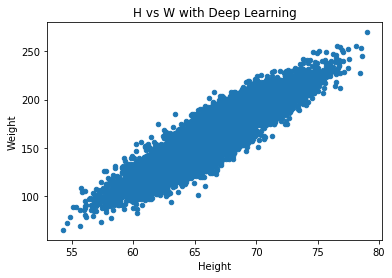

In [12]:
df.plot(kind="scatter", x="Height", y="Weight", title="H vs W with Deep Learning")
plt.plot